In [2]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split    
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from concurrent.futures import ThreadPoolExecutor, as_completed
from scipy.spatial.distance import minkowski
from sklearn.metrics import  confusion_matrix,precision_score,recall_score,f1_score

C:\Users\soumi\AppData\Local\Temp\ipykernel_22240\2070992333.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
def to_gray(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [4]:
def get_nblocks(arr, tile_size=4):
    r, c = arr.shape
    tilings = []

    for i in range(0, r, tile_size):
        for j in range(0, c, tile_size):
            tiling = arr[i:i + tile_size, j:j + tile_size]
            tilings.append(tiling)

    return np.array(tilings)

In [5]:
def get_block_meansvars(arr):
    means_vars = []
    for block in arr:
        means_vars.append([np.mean(block), np.var(block)])
    return np.array(means_vars)


In [6]:
def get_img_features(img):
    blocks = get_nblocks(img)
    return get_block_meansvars(blocks)


In [7]:
def extract_features(filepath, label):
    img = cv2.imread(filepath)
    gray_img = to_gray(img)
    features = get_img_features(gray_img)
    return features, label


In [8]:
def load_imgs_from_directory(directory, label, num_images=None):
    images = []
    labels = []
    files = os.listdir(directory)
    if num_images is not None:
        files = files[:num_images]
    with ThreadPoolExecutor(max_workers=8) as executor:
        temp = [executor.submit(extract_features, os.path.join(directory, filename), label) for filename
                   in files]
        
        for i in as_completed(temp):
            features, lbl = i.result()
            images.append(features)
            labels.append(lbl)
    return images, labels

In [9]:
train_fake='E:\zipp\college\Third Year\\5th Sem\ML\ML\Lab 3\\train\FAKE'
train_real='E:\zipp\college\Third Year\\5th Sem\ML\ML\Lab 3\\train\REAL'
num_images = 10000

In [10]:
fake_images, fake_labels = load_imgs_from_directory(train_fake, 0, num_images=num_images)
real_images, real_labels = load_imgs_from_directory(train_real, 1, num_images=num_images)

In [11]:
fake_images_mean , fake_images_var = [], []
for j in range(len(fake_images[0])):
    temp1, temp2 = [], []
    for i in range(num_images):
        temp1.append(fake_images[i][j][0])
        temp2.append(fake_images[i][j][1])
    fake_images_mean.append(temp1)
    fake_images_var.append(temp2)
fake_images_mean = np.array(fake_images_mean)
fake_images_var = np.array(fake_images_var)

real_images_mean , real_images_var = [], []
for j in range(len(fake_images[0])):
    temp1, temp2 = [], []
    for i in range(num_images):
        temp1.append(real_images[i][j][0])
        temp2.append(real_images[i][j][1])
    real_images_mean.append(temp1)
    real_images_var.append(temp2)
real_images_mean = np.array(real_images_mean)
real_images_var = np.array(real_images_var)

In [12]:
for i in range(64):
    temp1=real_images_mean[i]
    temp2=fake_images_mean[i]
    print("Mean of "+str(j+1)+"th block of real images => " + str(np.mean(temp1)))
    print("Mean of "+str(j+1)+"th block of fake images => " + str(np.mean(temp2)))
    print("Std of "+str(j+1)+"th block of real images => " + str(np.std(temp1)))
    print("Std of "+str(j+1)+"th block of fake images => " + str(np.std(temp2)))

Mean of 64th block of real images => 133.39768125
Mean of 64th block of fake images => 102.15253125
Std of 64th block of real images => 67.82628748673167
Std of 64th block of fake images => 55.80225339381151
Mean of 64th block of real images => 134.60771875
Mean of 64th block of fake images => 109.4345125
Std of 64th block of real images => 65.41746641904227
Std of 64th block of fake images => 53.556349643796615
Mean of 64th block of real images => 136.42166875
Mean of 64th block of fake images => 112.78051875
Std of 64th block of real images => 63.696315310519715
Std of 64th block of fake images => 52.21041391657677
Mean of 64th block of real images => 137.201425
Mean of 64th block of fake images => 114.43456875
Std of 64th block of real images => 63.26674892370893
Std of 64th block of fake images => 51.49701636155389
Mean of 64th block of real images => 137.35331875
Mean of 64th block of fake images => 114.5045
Std of 64th block of real images => 63.16071521079399
Std of 64th block o

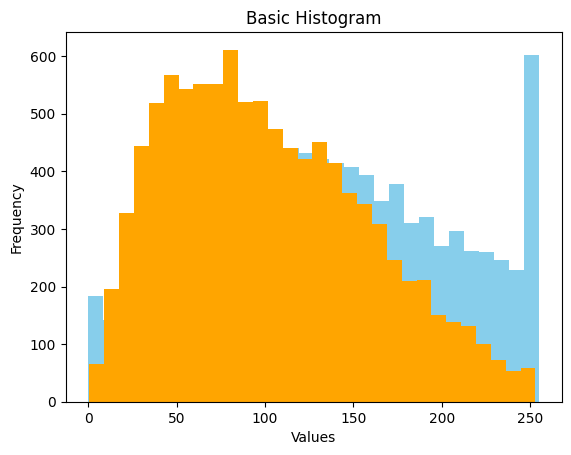

In [13]:
for i in range(1):
    temp1=real_images_mean[i]
    temp2=fake_images_mean[i]
    plt.hist(x=temp1, bins=30, color='skyblue')
    plt.hist(x=temp2, bins=30, color='orange')
    
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.title('Basic Histogram')
    plt.show()
fake_images_mean = np.transpose(fake_images_mean)
real_images_mean = np.transpose(real_images_mean)
fake_images_var = np.transpose(fake_images_var)
real_images_var = np.transpose(real_images_var)
features_m = np.vstack((fake_images_mean, real_images_mean))
features_v = np.vstack((fake_images_var, real_images_var))
labels = np.concatenate((fake_labels, real_labels))

In [14]:

def feature_vec(mean, var):
    a=[]
    for i,j in zip(mean, var):
        b=[]
        for k,l in zip(i,j):
            b.append(k)
            b.append(l)
        a.append(b)
    return a

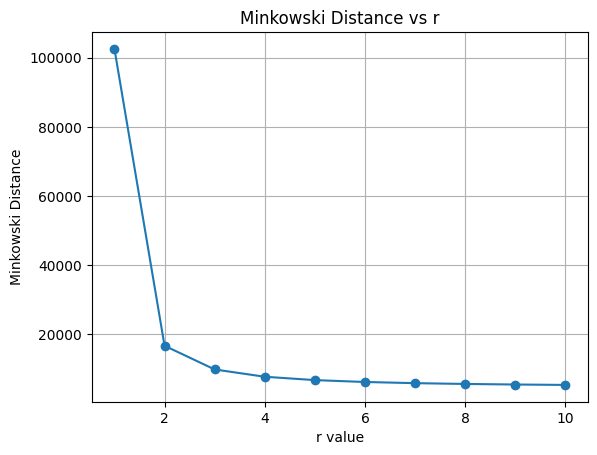

In [15]:

real_feat_vec = feature_vec(real_images_mean, real_images_var)
fake_feat_vec = feature_vec(fake_images_mean, fake_images_var)

r_values = range(1, 11)
distances = [minkowski(real_feat_vec[0], fake_feat_vec[0], r) for r in r_values]

plt.plot(r_values, distances, marker='o')
plt.xlabel('r value')
plt.ylabel('Minkowski Distance')
plt.title('Minkowski Distance vs r')
plt.grid(True)
plt.show()

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(features_m, labels, test_size=0.2, random_state=32)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)

accuracy = knn.score(X_test, Y_test)
print("Accuracy:", accuracy)

training_accuracy = knn.score(X_train, Y_train)
print(f"Training Accuracy: {training_accuracy}")
predictions = knn.predict(X_test[:20])
actual_labels = Y_test[:20]

# for i in range(len(predictions)):
#     print(f"Predicted: {predictions[i]}\tActual: {actual_labels[i]}")   

predicted_vs_actual = pd.DataFrame({"Actual": actual_labels, "Predicted": predictions})
predicted_vs_actual

Accuracy: 0.6715
Training Accuracy: 0.8308125


,Actual,Predicted
0,1,1
1,1,1
2,1,1
3,1,0
4,1,1
5,1,1
6,1,0
7,1,1
8,0,0
9,0,0


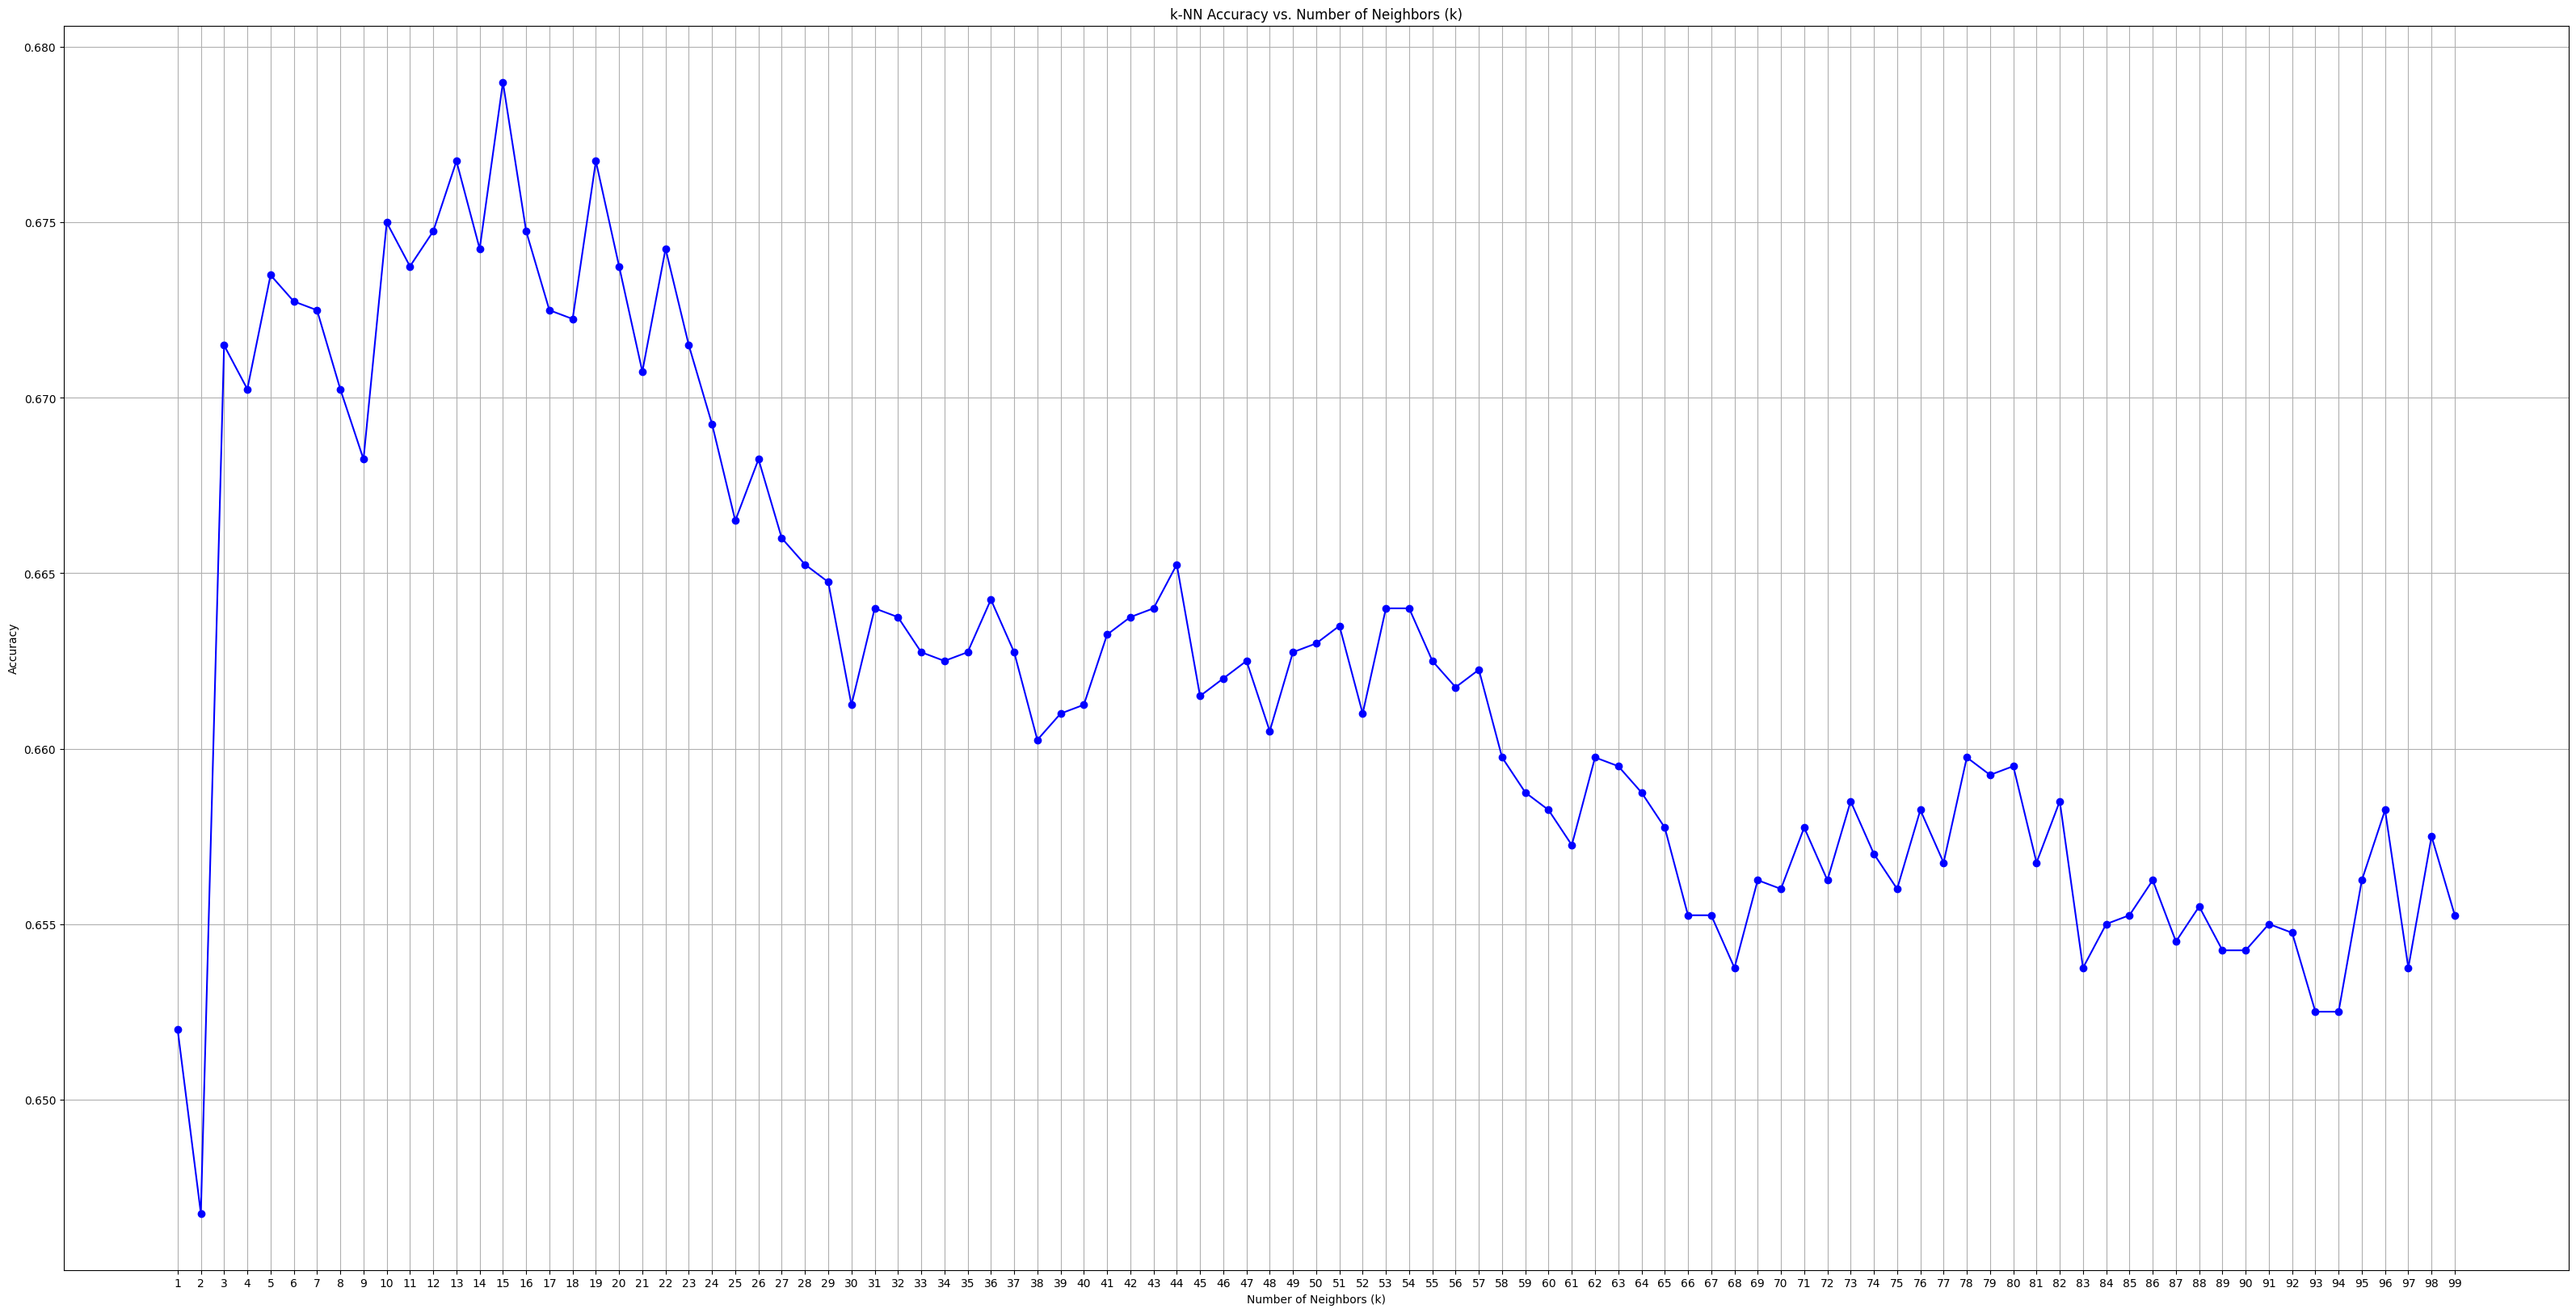

,K-Value,Accuracy
1,1,0.65200
2,2,0.64675
3,3,0.67150
4,4,0.67025
5,5,0.67350
...,...,...
95,95,0.65625
96,96,0.65825
97,97,0.65375
98,98,0.65750


In [23]:

k_values = range(1, 100)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_pred)
    accuracies.append(accuracy)
    # print(f"Accuracy for k={k}: {accuracy}")  
            
accuracies_df = pd.DataFrame({"K-Value":k_values,"Accuracy": accuracies},index=k_values)


plt.figure(figsize=(40,20))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b')
plt.title('k-NN Accuracy vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)

plt.grid(True)
plt.show()

accuracies_df  

In [24]:

conf_mat = confusion_matrix(Y_test,Y_pred)
precision = precision_score(Y_test,Y_pred)
recall = recall_score(Y_test,Y_pred)
f_score = f1_score(Y_test,Y_pred)

print(f"Confusion Matrix:\n{conf_mat}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f_score}")

Confusion Matrix:
[[1363  654]
 [ 725 1258]]
Precision: 0.6579497907949791
Recall: 0.6343923348461926
F1 Score: 0.6459563543003851
